# Make figures for paper on geometric images

## Authors:
- **David W. Hogg** (NYU) (MPIA) (Flatiron)
- **Soledad Villar** (JHU)

## To-do items and bugs:
- Make plots (and maybe a LaTeX table) that illustrate the group B_d.
- Figure out a better way to plot in `D=3`.

In [1]:
import sys
sys.path.insert(0,'../src/geometricconvolutions/')

In [2]:
import itertools as it
import numpy as np
import geometric as geom
import utils
import finufft
import pylab as plt
%load_ext autoreload
%autoreload 2

In [3]:
D = 2
group_operators = geom.make_all_operators(D)

In [28]:
allfilters_big = {}
allfilters = {}
names_big = {}
names = {}
maxn = {}
for M in [3,5]:
    maxn[(D, M)] = 0
    klist = (0,1,2)
    if M > 3:
        klist = (0,1)
    bigkey = (D, M)
    allfilters_big[bigkey] = []
    names_big[bigkey] = []
    for k, parity in it.product(klist, (0, 1)):
        key = (D, M, k, parity)
        allfilters[key] = geom.get_unique_invariant_filters(M, k, parity, D, group_operators)
        allfilters_big[bigkey] += allfilters[key]
        names[key] = [f"{geom.ktensor.name(k, parity)} {i}" for i in range(len(allfilters[key]))]
        names_big[bigkey] += names[key]

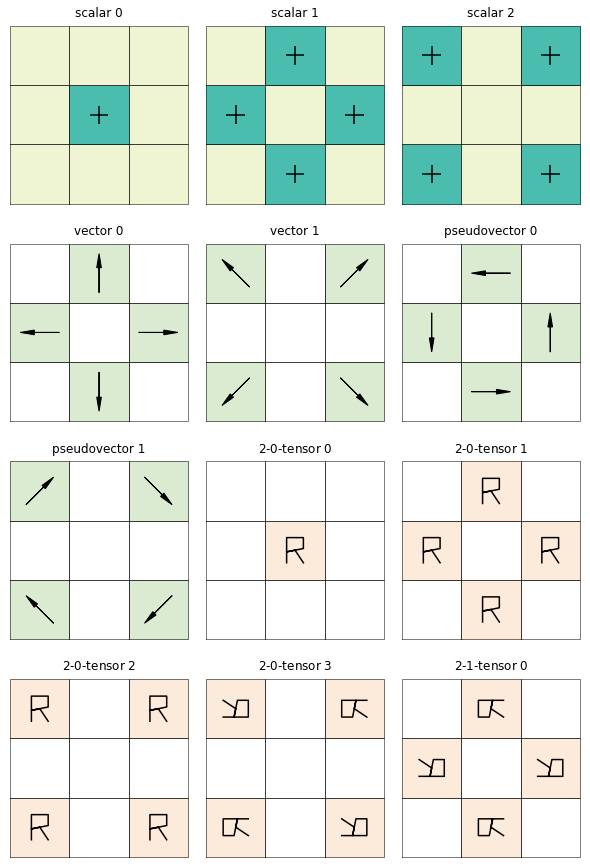

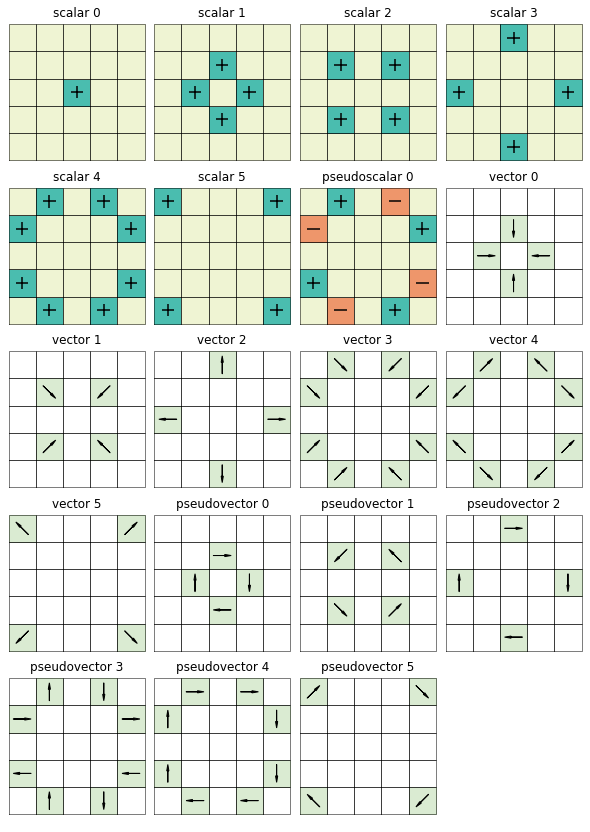

In [30]:
dpi = 300
paritysign = {0: "+", 1: "-"}
for key in allfilters_big.keys():
    D, M = key
    fig = utils.plot_filters(allfilters_big[key], names_big[key],
                            np.floor(np.sqrt(len(names_big[key]))).astype(int))
    plotname = "filter_{}_{}.png".format(D, M)
#     fig.savefig(plotname, dpi=dpi)

In [31]:
# make a sensible smooth scalar image on a 2-torus
N = 16
D = 2
np.random.seed(42)
image = np.random.normal(size=D * (N, ))
foo = np.pi * np.arange(-1. + 1. / N, 1., 2. / N)
ys, xs = np.meshgrid(foo, foo) # ys, xs or xs, ys??
ft = finufft.nufft2d1(xs.flatten(), ys.flatten(), image.flatten().astype(complex), (6, 5))
package = finufft.nufft2d2(xs.flatten(), ys.flatten(), ft).reshape(N, N).real
package -= np.mean(package)
package /= np.sqrt(np.mean(package ** 2))
scalar_image = geom.geometric_image(package, 1, D)

In [32]:
filters = [(allfilters[(D, 5, 0, 0)][4], r"C_{s}"),
           (allfilters[(D, 5, 0, 1)][0], r"C_{ps}"),
           (allfilters[(D, 3, 1, 0)][0], r"C_{v}"),
           (allfilters[(D, 3, 1, 1)][0], r"C_{pv}"),
          ]

In [33]:
monomials = {}
monomials[1] = [(scalar_image.normalize(), r"s"), ]
monomials[1] += [(scalar_image.convolve_with(ff).normalize(),
                  r"s\ast " + tt) for ff, tt in filters]

5 2 3
<<class 'geometric.geometric_image'> object in D=2 with N=16, k=1, and parity=1>
<<class 'geometric.geometric_image'> object in D=2 with N=16, k=1, and parity=0>


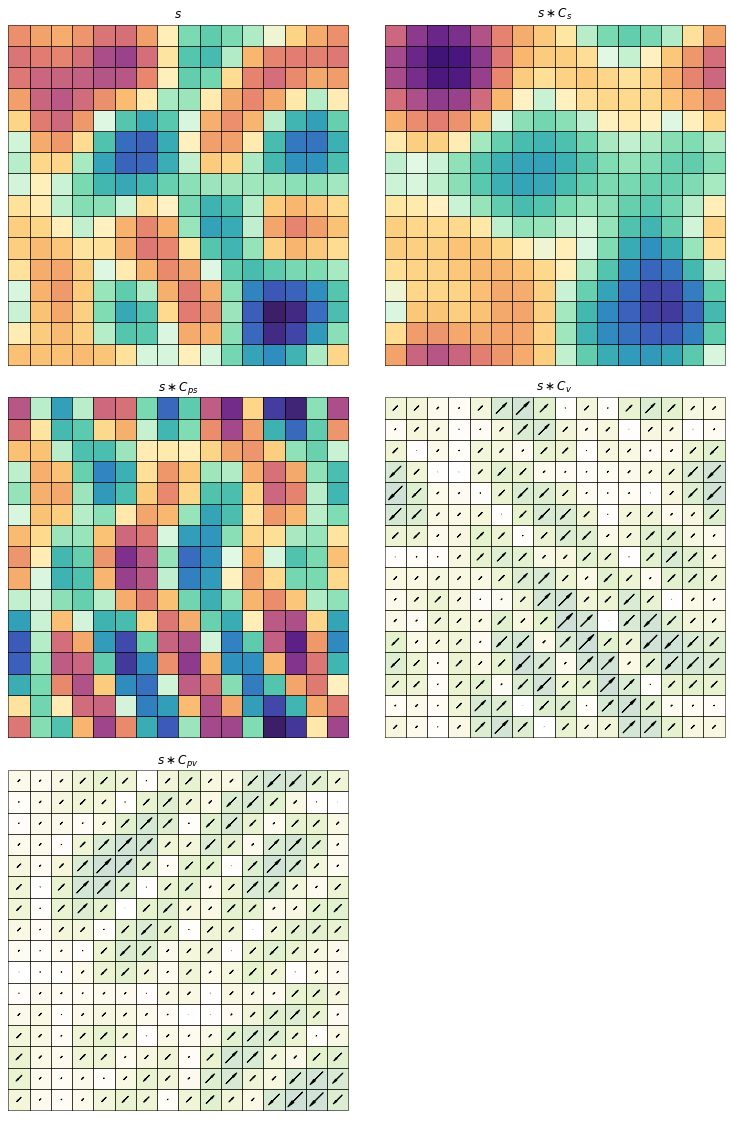

In [42]:
degree = 1
fig = utils.plot_images(monomials[degree])
# fig.savefig("monomials_{}.png".format(degree), dpi=dpi)

In [43]:
# next order!
monomials[2] = []
n = len(monomials[1])
for i in range(n):
    for j in range(i, n):
        image1, latex1 = monomials[1][i]
        image2, latex2 = monomials[1][j]
        monomials[2] += [((image1 * image2).normalize(),
                          "(" + latex1 + r")\otimes(" + latex2 + ")"),
                        ]
foo = []
for image, latex in monomials[2]:
    if image.k > 1:
        image = image.contract(0, 1).normalize()
        latex = r"\mathrm{Tr}[" + latex + "]"
    foo += [(image, latex), ]
monomials[2] = foo

15 3 5


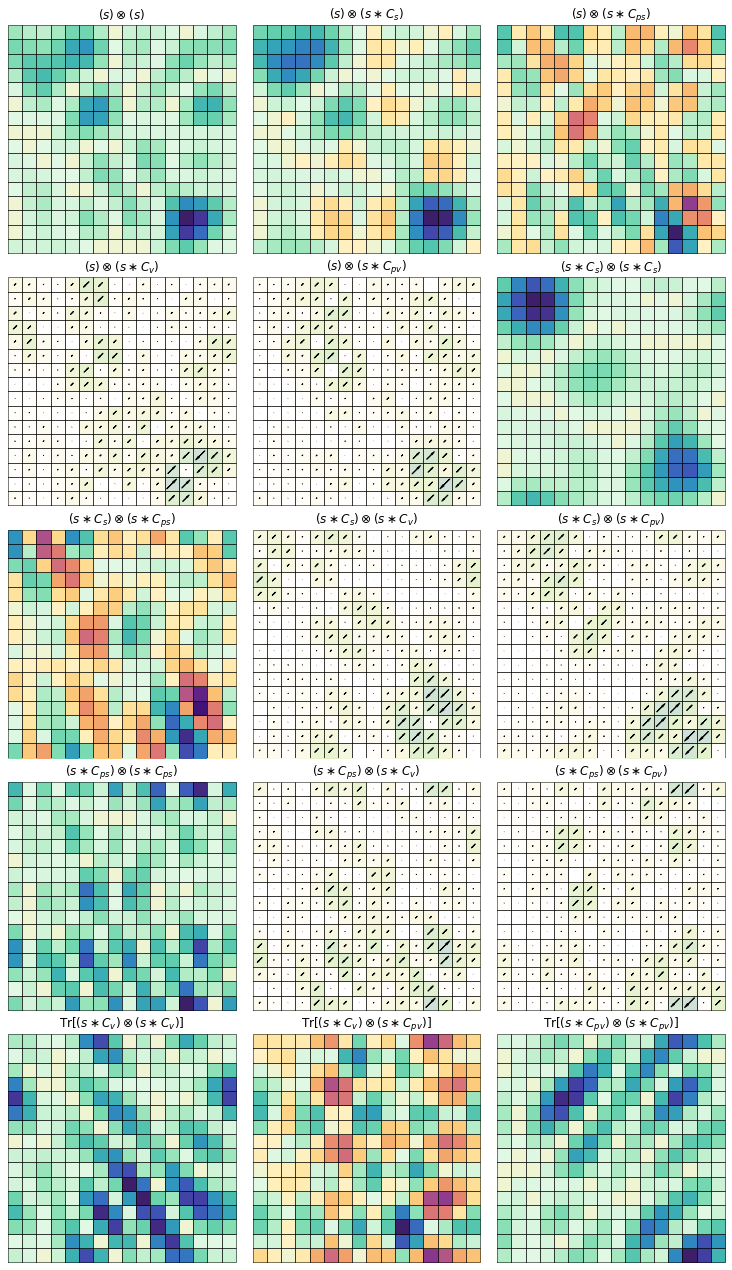

In [45]:
degree = 2
fig = utils.plot_images(monomials[degree])
# fig.savefig("monomials_{}.png".format(degree), dpi=dpi)